In [40]:
# IMPORTS

import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
from pathlib import Path
import re
import tensorflow as tf
from tensorflow import keras
from keras import layers
%matplotlib inline

In [41]:
# create a path to the pokemon image directory
train_dir = 'images/images'
train_path = Path(train_dir)

# create a dataframe with the name and filepath of each pokemon
files = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]
image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x))
image_df.head()

# load in csv with the name, primary type, and secondary type of each pokemon

label_df = pd.read_csv('pokemon.csv')

#dictionary of starters and gens as key

starterList = {
               "1" : [
                       "bulbasaur", "Ivysaur", "Venusaur",
                       "Charmander", 'Charmeleon', "Charizard", 
                       "Squirtle", 'Wartortle', 'Blastoise'
                     ],
               "2" : [
                       'Chikorita', 'Bayleef', 'Meganium',
                       'Cyndaquil', 'Quilava', 'Typhlosion',
                       'Totodile', 'Croconaw', 'Feraligatr'
                    ],
               "3" : [
                       'Treecko', 'Grovyle', 'Sceptile',
                       'Torchic', 'Combusken', 'Blaziken',
                       'Mudkip', 'Marshtomp','Swampert' 
                    ],
               "4" : [
                       'Turtwig', 'Grotle', 'Torterra',
                       'Chimchar', 'Monferno', 'Infernape' ,
                       'Piplup', 'Prinplup', 'Empoleon'
                   ],
               "5" : [
                       'Snivy', 'Servine', 'Serperior',
                       'Tepig', 'Pignite', 'Emboar',
                       'Oshawott', 'Dewott', 'Samurott'
                   ],
               "6" : [
                       'Chespin', 'Quilladin', 'Chesnaught',
                       'Fennekin', 'Braixen', 'Delphox',
                       'Froakie', 'Frogadier', 'Greninja'
                   ],
               "7" : [
                       'Rowlet', 'Dartrix', 'Decidueye',  
                       'Litten', 'Torracat', 'Incineroar',
                       'Popplio', 'Brionne', 'Primarina'
                   ]
              }

# GETS STARTERS (undercase)

newStart = []
for key, values in starterList.items():
    for i in values:
        newStart.append(i.lower())
            
#Create a list of whether a pokemon is a starter or not
            
startornah = []
for i in label_df['Name']:
    if i in newStart:
        startornah.append(1)
    else:
        startornah.append(0)

        
# Create a list of which gen every pokemon is
        
genList = []

for index, i in enumerate(label_df['Name']):
    if index < 151:
        genList.append(1)
    elif index < 251:
        genList.append(2)
    elif index < 386:
        genList.append(3)
    elif index < 494:
        genList.append(4)
    elif index < 649:
        genList.append(5)
    elif index < 721:
        genList.append(6)
    else:
        genList.append(7)



label_df["Starter"] = startornah
label_df["Gen"] = genList


# TESTING TO SEE IF GENS ARE CORRECTLY PLACED

print(label_df[150:155])
print(label_df[250:260])
print(label_df[380:390])
print(label_df[490:500])
print(label_df[645:650])
print(label_df[720:730])

# merge image_df with label_df (adding gen, filename, and starter columns)
df = image_df.merge(label_df, on='Name')

# drop the Name and Type2 columns
#############
# not sure if we should keep name or not for our model. The model might memorize the name and associate it with starter or not values. Not sure yet
#############

df = df.drop(['Name', 'Type2'], axis=1) 
df.head()


          Name    Type1 Type2  Starter  Gen
150        mew  Psychic   NaN        0    1
151  chikorita    Grass   NaN        1    2
152    bayleef    Grass   NaN        1    2
153   meganium    Grass   NaN        1    2
154  cyndaquil     Fire   NaN        1    2
          Name    Type1     Type2  Starter  Gen
250     celebi  Psychic     Grass        0    2
251    treecko    Grass       NaN        1    3
252    grovyle    Grass       NaN        1    3
253   sceptile    Grass       NaN        1    3
254    torchic     Fire       NaN        1    3
255  combusken     Fire  Fighting        1    3
256   blaziken     Fire  Fighting        1    3
257     mudkip    Water       NaN        1    3
258  marshtomp    Water    Ground        1    3
259   swampert    Water    Ground        1    3
              Name    Type1    Type2  Starter  Gen
380         latios   Dragon  Psychic        0    3
381         kyogre    Water      NaN        0    3
382        groudon   Ground      NaN        0    3
383 

,Filepath,Type1,Starter,Gen
0,images/images/barbaracle.png,Rock,0,6
1,images/images/hoppip.png,Grass,0,2
2,images/images/kangaskhan.png,Normal,0,1
3,images/images/weavile.png,Dark,0,4
4,images/images/greninja.png,Water,1,6


In [42]:
print("Number of pokemon in dataset:", len(df))

Number of pokemon in dataset: 809


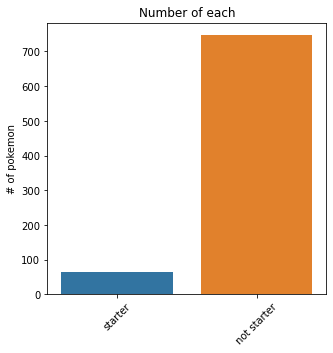

In [43]:
# list of categories for index on graph
num_starters = ["starter", "not starter"]

# find the number of starters in comparison to rest of pokemon (1-7 gen)
num_stats = [(df["Starter"] == 1).sum(), (df["Starter"] == 0).sum()]

# creates a dataframe for the number of pokemon for each type
type1_data = pd.DataFrame(data=num_stats, index=num_starters, columns=['# of pokemon'])

# plot number of each type of pokemon
plt.figure(figsize=(5,5))
plt.title('Number of each')
ax = sns.barplot(x=type1_data.index, y='# of pokemon', data=type1_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")
plt.show()



In [44]:
df.head(20)

,Filepath,Type1,Starter,Gen
0,images/images/barbaracle.png,Rock,0,6
1,images/images/hoppip.png,Grass,0,2
2,images/images/kangaskhan.png,Normal,0,1
3,images/images/weavile.png,Dark,0,4
4,images/images/greninja.png,Water,1,6
5,images/images/sceptile.png,Grass,1,3
6,images/images/lilligant.png,Grass,0,5
7,images/images/gliscor.png,Ground,0,4
8,images/images/tyranitar.png,Rock,0,2
9,images/images/corsola.png,Water,0,2


Starter list: [187, 12, 5, 24, 47, 4, 52]
Non-starter list: [2, 1, 21, 3, 6, 0, 30]
Example of array [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Len of starter list: 7
Len of non-starter list: 7


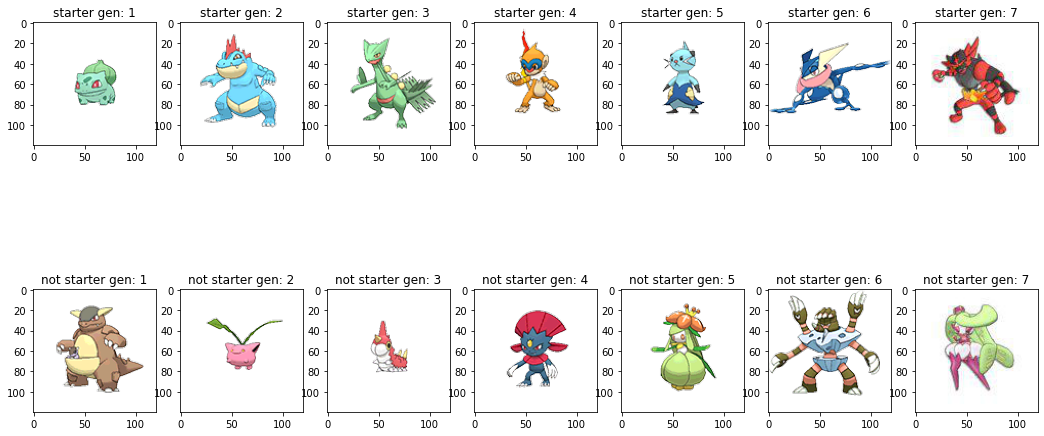

In [45]:
# determine the indices of the first occurrance of each pokemon type

gens = [1,2,3,4,5,6,7]
starterEachGen = []
pokNonStarter = []
for gen in gens:
    
    # using this method I can use conditionals to filter out specific results from the dataframe
    
    starterSearch = df[(df['Gen'] == gen ) & (df['Starter'] == 1)]
    nonStarterSearch = df[(df['Gen'] == gen ) & (df['Starter'] == 0)]
    
    # append indices to each respective list
    
    starterEachGen.append(starterSearch.index[0])
    pokNonStarter.append(nonStarterSearch.index[0])

print("Starter list:", starterEachGen)
print("Non-starter list:", pokNonStarter)

# Creates vertices of each image so the computer can understand

startimgs = []
nonStartimgs = []

for i in range(len(starterEachGen)):
    
    # grabs image filepath from specific index and generates 
    
    '''
    Documentation:
    PNG images are returned as float arrays (0-1). 
    All other formats are returned as int arrays, with a bit depth determined by the file's contents.
    '''
    
    startimgs.append(mpimg.imread(df.iat[starterEachGen[i], 0]))
    nonStartimgs.append(mpimg.imread(df.iat[pokNonStarter[i], 0]))

print('Example of array', startimgs[0])
print("Len of starter list:", len(startimgs))
print("Len of non-starter list:", len(nonStartimgs))


# displays images of starters and non starter images side by side

f, axarr = plt.subplots(2,7, figsize=(18,9))  

for row in range(2):
    for col in range(7):
        gen = col
        if row == 0:
            axarr[row,col].imshow(startimgs[col])
            axarr[row,col].set_title(num_starters[row] + " gen: " + str(gen + 1))
        else:
            axarr[row,col].imshow(nonStartimgs[col])
            axarr[row,col].set_title(num_starters[row] + " gen: " + str(gen + 1))
    

plt.show()

In [10]:
print("Number of Starters:", len(df[df['Starter'] == 1]))
print("Number of Non-Starters:", len(df[df['Starter'] == 0]))

Number of Starters: 63
Number of Non-Starters: 746


In [13]:
df.head()

,Filepath,Type1,Starter,Gen
0,images/images/yveltal.png,Dark,0,6
1,images/images/mienshao.png,Fighting,0,5
2,images/images/pyroar.png,Fire,0,6
3,images/images/castform.png,Normal,0,3
4,images/images/scraggy.png,Dark,0,5


In [26]:
# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

train_gen = keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,   # split the dataset into a training set and a validation set in an 8:2 ratio
    rescale=1./255          # rescale the rgb values to fit between 0 and 1 
)

# need to turn this into a string value rather than int 0 and 1 :|

df['Starter']=df['Starter'].astype(str)

train_data = train_gen.flow_from_dataframe(
    df,
    x_col='Filepath',
    y_col='Starter',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='binary',
    batch_size=32,
    seed=1,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    df,
    x_col='Filepath',
    y_col='Starter',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='sparse',
    batch_size=32,
    seed=1,
    subset='validation'
)

Found 648 validated image filenames belonging to 2 classes.
Found 161 validated image filenames belonging to 2 classes.


In [27]:
img_input = layers.Input(shape=(120, 120, 4))

x = layers.Conv2D(filters=64, kernel_size=(8, 8), activation='relu')(img_input)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters=128, kernel_size=(8, 8), activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters=256, kernel_size=(8, 8), activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs=img_input, outputs=output)

model.compile(
    optimizer='adam',                 
    loss='binary_crossentropy',
    metrics=['acc', keras.metrics.AUC()]
)

# print model layers
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 256)       209740

2022-02-20 15:06:11.370770: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:


history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=32,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau()
    ]
)



Epoch 1/20
21/21 [==============================] - 34s 2s/step - loss: 1.2428 - acc: 0.8981 - auc: 0.4741 - val_loss: 0.2104 - val_acc: 0.9627 - val_auc: 0.5570 - lr: 0.0010
Epoch 2/20
21/21 [==============================] - 35s 2s/step - loss: 0.3112 - acc: 0.9120 - auc: 0.4621 - val_loss: 0.1864 - val_acc: 0.9627 - val_auc: 0.5527 - lr: 0.0010
Epoch 3/20
21/21 [==============================] - 35s 2s/step - loss: 0.3039 - acc: 0.9120 - auc: 0.4688 - val_loss: 0.1684 - val_acc: 0.9627 - val_auc: 0.6118 - lr: 0.0010
Epoch 4/20
21/21 [==============================] - 36s 2s/step - loss: 0.3005 - acc: 0.9120 - auc: 0.5211 - val_loss: 0.1690 - val_acc: 0.9627 - val_auc: 0.5860 - lr: 0.0010
Epoch 5/20
21/21 [==============================] - 38s 2s/step - loss: 0.2988 - acc: 0.9120 - auc: 0.5528 - val_loss: 0.1670 - val_acc: 0.9627 - val_auc: 0.5978 - lr: 0.0010
Epoch 6/20
21/21 [==============================] - 38s 2s/step - loss: 0.2981 - acc: 0.9120 - auc: 0.5556 - val_loss: 0.1647

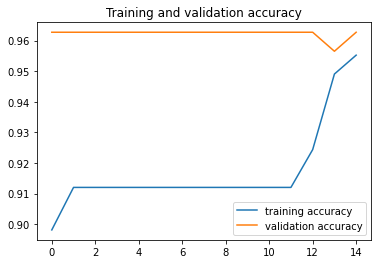

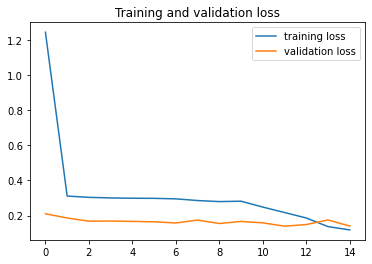

In [30]:
# retrieve accuracy history on training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']

# retrieve loss history on training and validation data
loss = history.history['loss']
val_loss = history.history['val_loss']

# get number of epochs
epochs = range(len(acc))

# plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# plot training and validation loss per epoch
plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training and validation loss')
plt.legend()

In [31]:
# get true labels
true_labels = val_data.labels

# get predictions in the form of probablities 
predictions = model.predict(val_data)

# convert probablities into binary values 
predictions = [1 if n >= 0.5 else 0 for n in predictions]
print("Model predictions: "+str(predictions))
print("Actual labels:     "+str(true_labels))

# determine filepaths of misclassified pokemon
num_misclasssified = 0
misclassified_filepaths = []
correctness = []
for pred, label, i in zip(predictions, true_labels, range(len(predictions))):
  misclassified_filepaths.append(val_data.filepaths[i])
  if pred != label:
    correctness.append('incorrect')
    num_misclasssified += 1
  else:
    correctness.append('correct')

print("# of misclassified pokemon: "+str(num_misclasssified))

6/6 [==============================] - 2s 295ms/step
Model predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Actual labels:     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

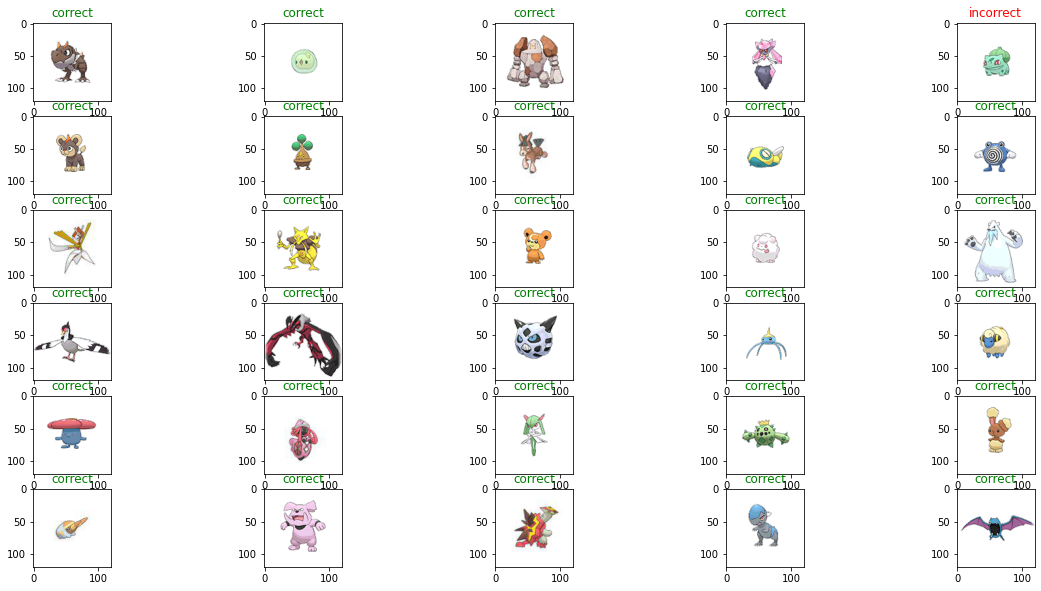

In [35]:
# obtain the images from the filepath at the determined indices
misclassified_imgs = []
for filepath in misclassified_filepaths:
  misclassified_imgs.append(mpimg.imread(filepath))

# plot results
f, axarr = plt.subplots(6,5, figsize=(20,10))  
count = 0
for r in range(6):
  for c in range(5):
    axarr[r,c].imshow(misclassified_imgs[count])
    if correctness[count] == 'correct':
      axarr[r,c].set_title(correctness[count], color='green')
    else:
      axarr[r,c].set_title(correctness[count], color='red')
    count += 1 
plt.show()


In [33]:
print("Percent correct: ", (len(correctness) / (num_misclasssified + len(correctness))))

Percent correct:  0.9640718562874252
